In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

cols = ['season', 'holiday','workingday', 'weather']
for i in cols:
    df[i] = df[i].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [11]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include='all')

C:\Users\91789\AppData\Local\Temp\ipykernel_16908\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [13]:
df.iloc[:,1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [18]:
#minimum datetime and maximum Datetime
print(df['datetime'].min(), df['datetime'].max())

2011-01-01 00:00:00 2012-12-19 23:00:00


In [20]:
#checking no. of unique values in each categorical columns
df[cols].melt().groupby(['variable','value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [21]:
#Univariate Analysis

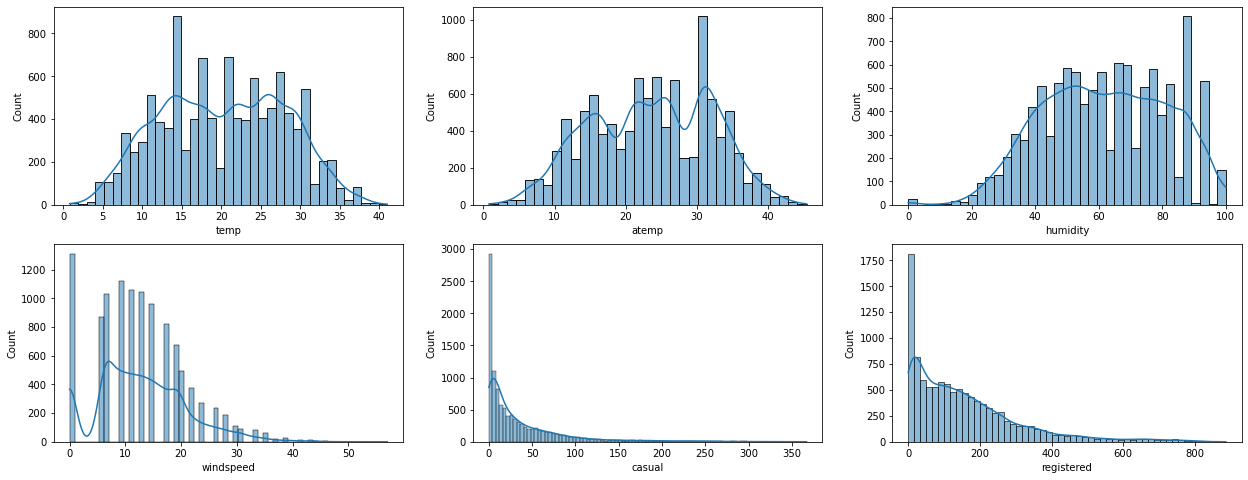

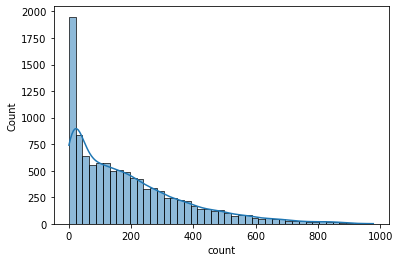

In [25]:
#undrestanding the distribution for numerical variables
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
fig.subplots_adjust(right=1.5)

index=0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axs[row,col], kde=True)
        index +=1
plt.show()

sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

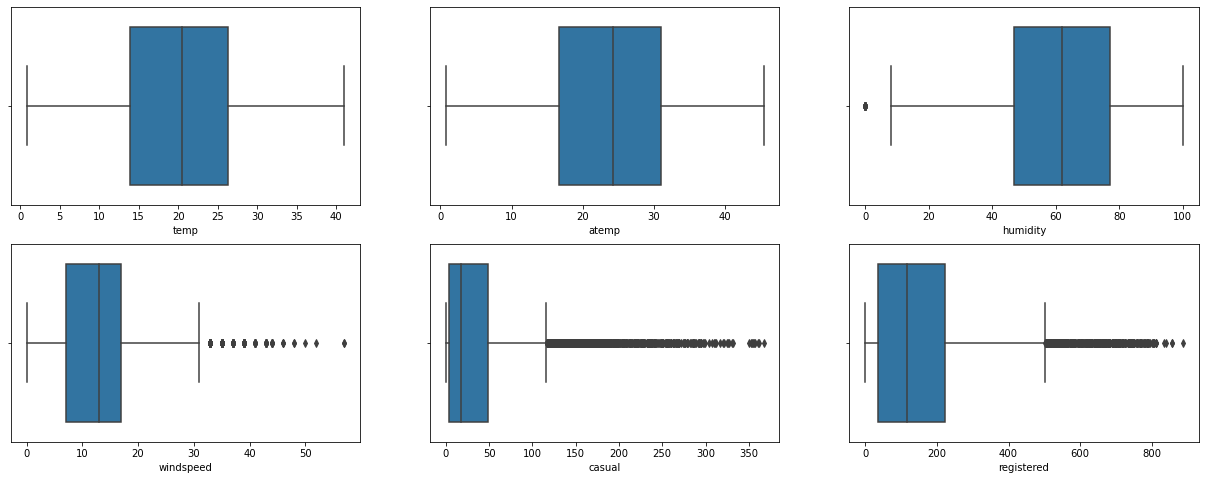

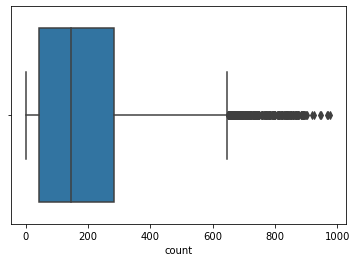

In [27]:
#plotting the boxplot to detect the outliers
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
fig.subplots_adjust(right=1.5)

index=0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axs[row,col])
        index +=1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

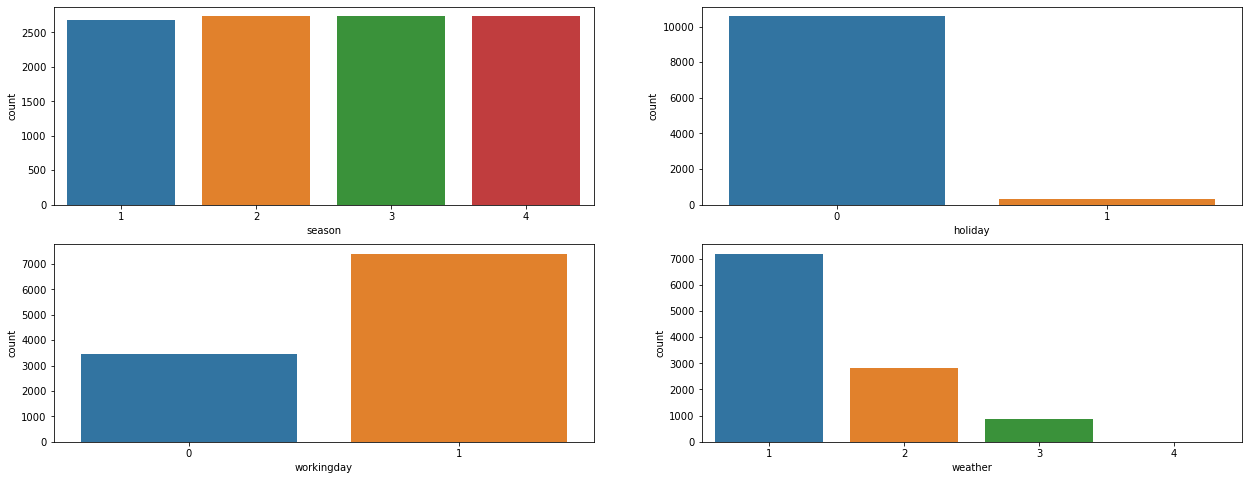

In [29]:
#countplot for each categorical variables
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(right=1.5)

index=0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=df[cols[index]], ax=axs[row,col])
        index +=1
plt.show()

In [30]:
#Bi-variate Analysis

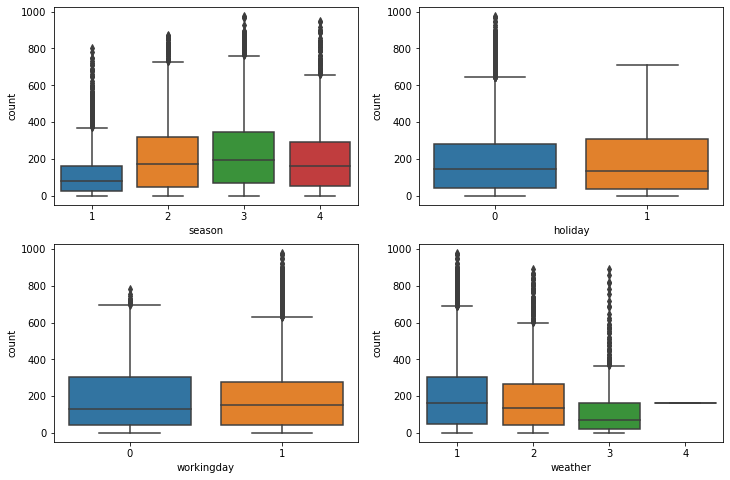

In [31]:
#Plotting categorical variables against count using boxplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

index=0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=df[cols[index]], y='count', ax=axs[row,col])
        index +=1
plt.show()

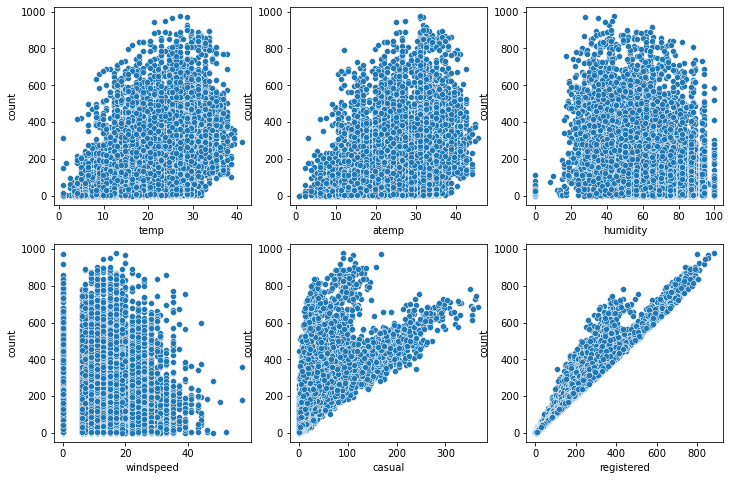

In [34]:
#plotting numerical variables against count using scatterplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

index=0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=df[num_cols[index]], y='count', ax=axs[row,col])
        index +=1
        
plt.show()

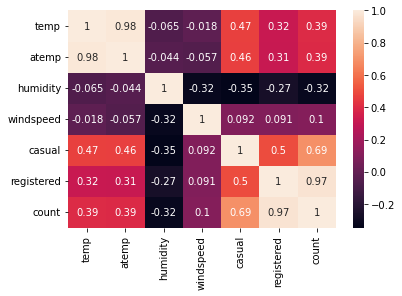

In [36]:
# understanding correlation between count and numerical variables
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
# Hypothesis Testing

In [39]:
# chi-square test to check if weather is dependent on the season

In [40]:
# H0 = weather is independent on the season
# Ha = weather is dependent on the season
# significance level(alpha) = 0.05

In [60]:
data1 = pd.crosstab(df['season'], df['weather'])
data1

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [61]:
from scipy.stats import chi2_contingency
val = chi2_contingency(data1)
print(val)

(49.158655596893624, 1.549925073686492e-07, 9, array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))


In [62]:
expected_values = val[3]
print(expected_values)

[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


In [63]:
n_rows, n_cols = 4,4
dof = (n_rows-1)*(n_cols-1)
print("Degree of Freedom:", dof)

Degree of Freedom: 9


In [64]:
chi_sqr = sum([(o-e)**2/e for o,e in zip(data1.values, expected_values)])
chi_sqr_statistics = chi_sqr[0] + chi_sqr[1]
print("chi_square_test_statistics:", chi_sqr_statistics)

chi_square_test_statistics: 44.09441248632364


In [65]:
from scipy.stats import chi2
alpha = 0.05
critical_val = chi2.ppf(q=1-alpha, df=dof)
print(f"critical_vale: {critical_val}")

critical_vale: 16.918977604620448


In [66]:
p_value = 1 - chi2.cdf(x=chi_sqr_statistics, df=dof)
print(f"p_value: {p_value}")

p_value: 1.3560001579371317e-06


In [67]:
if p_value <= alpha:
    print("P_value is less than alpha 0.05, we reject null hypothesis. we select Ha ie Weather is dependent on seaseon")
else:
    print("p_value is grater than alphs then we dont reject null hypothesis")

P_value is less than alpha 0.05, we reject null hypothesis. we select Ha ie Weather is dependent on seaseon


In [69]:
#  2 sample t-test
# To check if working day as effect on number of eletric cycles rented

In [70]:
# H0 = working day as no effect on the number of cycles rented.
# Ha = working day as effect on the number of cycles rented.
alpha = 0.05


In [71]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

In [72]:
data_group1

array([ 16,  40,  32, ..., 106,  89,  33], dtype=int64)

In [73]:
data_group2

array([  5,   2,   1, ..., 168, 129,  88], dtype=int64)

In [76]:
print(np.var(data_group1))

print(np.var(data_group2))

30171.346098942427
34040.69710674686


In [77]:
print(np.var(data_group2)//np.var(data_group1))

1.0


In [78]:
from scipy.stats import ttest_ind
ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

In [79]:
# ANOVA 
# to check if number of cycles rented is similar or differnet in different weather and season

In [80]:
# H0 = No. of cycles rented is similar in different weather and season
# Ha = No. of cycles rented is differnted in different weather and season
alpha=0.05

In [118]:
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

groups = [gp1,gp2, gp3,gp4,gp5,gp6,gp7,gp8]

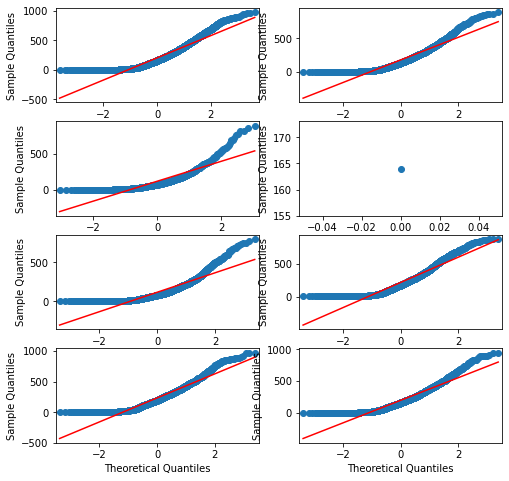

In [119]:
import statsmodels.api as sm
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
index=0
for row in range(4):
    for col in range(2):
        sm.qqplot(groups[index],ax=axis[row,col], line='s')
        index +=1
plt.show()

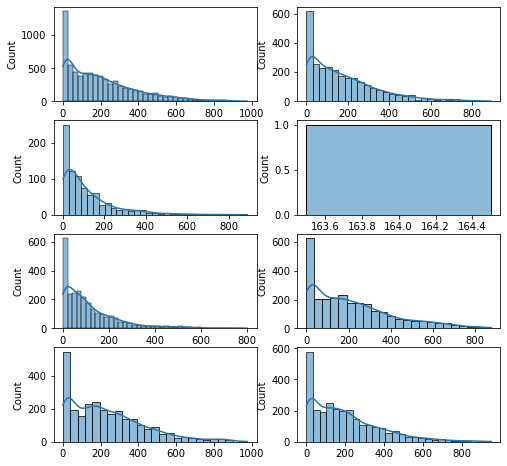

In [120]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1
plt.show()

In [121]:
# LEVENE Test
from scipy.stats import levene

In [122]:
#Null Hypothesis: Variances is similar in different weather and season.
#Alternate Hypothesis: Variances is not similar in different weather and season.
#Significance level (alpha): 0.05
levene_stat, p_value = levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis.Variances are equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


In [123]:
# Assumptions of ANOVA failed we use kruskal wallis

In [124]:
from scipy.stats import kruskal
kruskal_stats, p_value = kruskal(gp1,gp2,gp3,gp4,gp4,gp6,gp7,gp8)

In [125]:
print(kruskal_stats)
print(p_value)

339.5254916435376
2.1498633253581624e-69


In [126]:
if p_value<0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis")

Since p-value is less than 0.05, we reject the null hypothesis
